# TP scientific analisys

## Natalia Debandi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [2]:
#leo el archivo desde mi computadora
online = False
if (online == True):
    url = requests.get('https://drive.google.com/file/d/1xS091zSODR9431r7GNJI4IYHoFRCCQCr/view?usp=sharing')
    csv_raw = StringIO(url.text)
    signals = pd.read_csv(csv_raw, delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
else:
    signals = pd.read_csv('C:\\Users\\natal\\OneDrive\\Nat2022\\Analisis datos\\datasets\\datos-cientificos\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

##lo guarde en el proyecto
##base = pd.read_csv('TPfinal\\data\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion :')
print('signals')
print(signals.head())

Estructura de la informacion :
signals
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0


In [3]:
##tomo los valores de eeg en un tensor de nunpy
data=signals.values
eeg_val=data[:,2]
print(eeg_val)

[ 32.  40.  42. ...  91. 114. 103.]


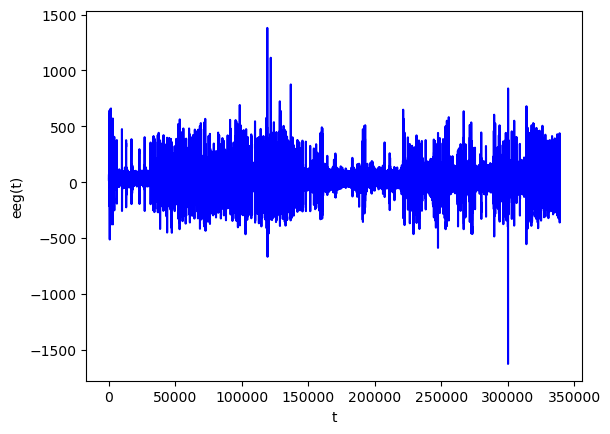

In [4]:
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');

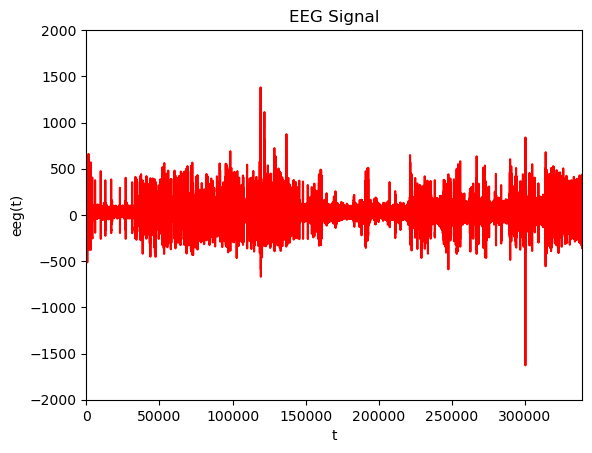

In [5]:
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()


In [6]:
signals.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.393010e+05,339301.000000,339301.000000,339301.000000,339301.000000,339301.0
mean,1.655925e+09,49.501127,31.001577,64.062720,41.658757,0.0
std,1.905190e+02,28.867526,90.962463,21.247321,17.424993,0.0
min,1.655925e+09,0.000000,-1628.000000,0.000000,0.000000,0.0
25%,1.655925e+09,24.000000,3.000000,47.000000,29.000000,0.0
50%,1.655925e+09,50.000000,33.000000,64.000000,41.000000,0.0
75%,1.655925e+09,75.000000,60.000000,81.000000,53.000000,0.0
max,1.655925e+09,99.000000,1380.000000,100.000000,100.000000,0.0


In [9]:
#import seaborn as sns
#sns.set(style="darkgrid")
#sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
#import matplotlib.pyplot as plt
#plt.show()

In [36]:
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,1.655925e+09
1,1.655925e+09,69,40,0,0,0,1.655925e+09
2,1.655925e+09,70,42,0,0,0,1.655925e+09
3,1.655925e+09,71,34,0,0,0,1.655925e+09
4,1.655925e+09,72,24,0,0,0,1.655925e+09


In [7]:
from datetime import datetime
signals.loc[1].iat[0]
fecha=datetime.fromtimestamp(signals.loc[1].iat[0])
print(fecha)

2022-06-22 16:06:04.970000


In [8]:
signals.dtypes
signals['date']=pd.to_datetime(signals['timestamp'], unit='s')
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,2022-06-22 19:06:04.970000128
1,1.655925e+09,69,40,0,0,0,2022-06-22 19:06:04.970000128
2,1.655925e+09,70,42,0,0,0,2022-06-22 19:06:04.970000128
3,1.655925e+09,71,34,0,0,0,2022-06-22 19:06:04.970000128
4,1.655925e+09,72,24,0,0,0,2022-06-22 19:06:04.970000128


El primer valor de la serie es 2022-06-22 19:06 mientras que el video arranca en el 2022-06-22 20:05.
El maximo valor de date es '2022-06-22 19:17:04.920000'

In [13]:
##reviso la diferencia entre los horarios para ver como sincronizar con el video
from datetime import datetime, timedelta

#create new column that contains timedelta between start and end
diff =  pd.to_datetime('2022-06-22 20:05') -  pd.to_datetime('2022-06-22 19:06')
#print(diff)

result = signals['date'].iat[0] + timedelta(minutes=59)
print(result)

2022-06-22 20:05:04.970000128


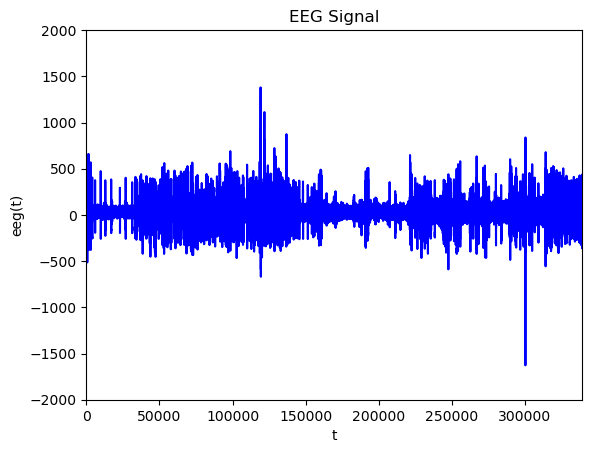

In [19]:
# sumo la diferencia de 59 minutos para sincronizar mejor con el video
signals['date']=signals['date'] + timedelta(minutes=59)
#signals.head()

signals_filtered=signals[]

data = signals.values
eeg = data[:,2]
#eeg[eeg>80]
#eegfiltered = np.logical_or(eeg>10,eeg<-40) 

#data=signals_filtered.values
#eeg_val=data[:,2]
#print(eeg_val)

plt.plot(eeg,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.show()

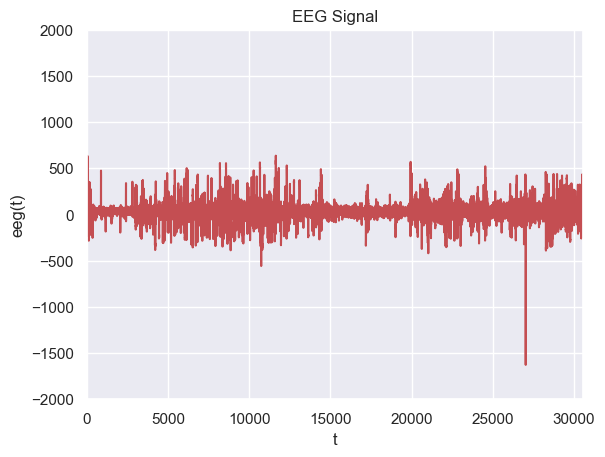

In [52]:
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

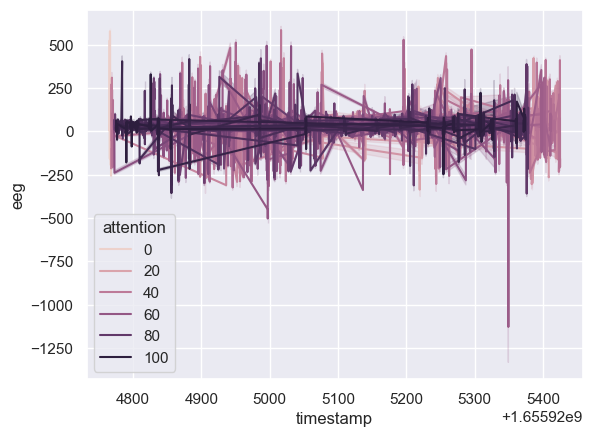

In [53]:

sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals_filtered)
plt.show()

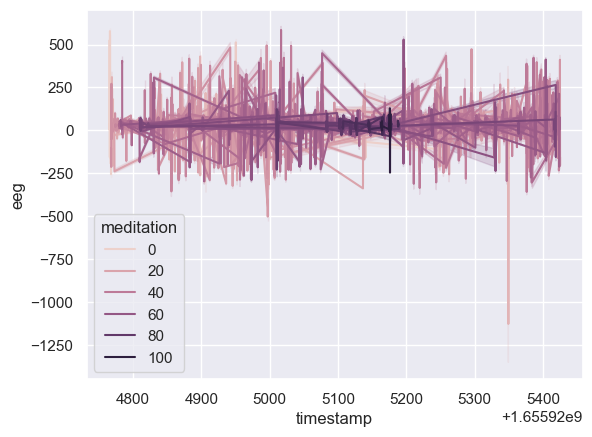

In [54]:
sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="eeg", hue="meditation", data=signals_filtered)
plt.show()